In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
train = pd.read_excel("BBDD_PD.xlsx")
test = pd.read_excel("BBDD_PD.xlsx", sheet_name="Escenarios proyectados")


1. Estimación de un modelo macroeconómico:

In [143]:
train.rename(columns={"Tasa incumplimiento": "Tasa_incumplimiento"}, inplace=True)
test.rename(columns={"Tasa incumplimiento": "Tasa_incumplimiento"}, inplace=True)

1.1 Regresión Lineal Múltiple

In [144]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Variables dependiente e independientes para TRAIN
X_train = train[["Paro", "PIB", "Precio_vivienda", "Mora_Adq_Vivienda"]]  # Predictoras
y_train = train["Tasa_incumplimiento"]  # Variable dependiente continua

test_ = test[['Paro', 'PIB', 'Precio_vivienda', 'Mora_Adq_Vivienda']]

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)

# Predicciones en TRAIN y TEST
train["Predicciones"] = model.predict(X_train)
test_["Predicciones"] = model.predict(test_)

# Evaluación del modelo en TEST
mse_train = mean_squared_error(y_train, train["Predicciones"])
r2_train = r2_score(y_train, train["Predicciones"])

print(f"MSE (Train): {mse_train:.6f}")
print(f"R² (Train): {r2_train:.6f}")


Coeficientes del modelo: [1.52314808e-01 2.57646146e-04 4.01060805e-05 2.00924106e-01]
Intercepto: -0.1181812607529587
MSE (Train): 0.000001
R² (Train): 0.924236


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir el conjunto de entrenamiento en dos partes
train_train = train.iloc[:29]  # Primeras 29 filas para entrenar
train_test = train.iloc[29:]  # Resto de las filas para validar

# Variables dependientes e independientes
y_train = train_train["Tasa_incumplimiento"]
X_train = train_train[["Paro", "PIB", "Precio_vivienda", "Mora_Adq_Vivienda"]]

y_test = train_test["Tasa_incumplimiento"]
X_test = train_test[["Paro", "PIB", "Precio_vivienda", "Mora_Adq_Vivienda"]]

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)

# Predicciones en TRAIN y TEST
train_train["Predicciones"] = model.predict(X_train)
train_test["Predicciones"] = model.predict(X_test)

# Evaluación del modelo en TEST
mse_test = mean_squared_error(y_test, train_test["Predicciones"])  # Debes usar y_test
r2_test = r2_score(y_test, train_test["Predicciones"])  # Debes usar y_test

print(f"MSE (Test): {mse_test:.6f}")
print(f"R² (Test): {r2_test:.6f}")


Coeficientes del modelo: [-2.18135294e-02 -1.43855489e-03  4.89367171e-05 -3.00133803e-02]
Intercepto: 0.08858271885765423


C:\Users\emarc\AppData\Local\Temp\ipykernel_400\2177523040.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_train["Predicciones"] = model.predict(X_train)
C:\Users\emarc\AppData\Local\Temp\ipykernel_400\2177523040.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test["Predicciones"] = model.predict(X_test)


ValueError: y_true and y_pred have different number of output (4!=1)

1.2 SARIMAX

                                     SARIMAX Results                                     
Dep. Variable:               Tasa_incumplimiento   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 4)   Log Likelihood                 131.429
Date:                           Mon, 02 Dec 2024   AIC                           -244.859
Time:                                   17:02:42   BIC                           -235.039
Sample:                               06-30-2013   HQIC                          -242.546
                                    - 06-30-2020                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Paro                 -0.0108      0.040     -0.266      0.790      -0.090       0.068
PIB                  -

C:\Users\emarc\AppData\Local\Temp\ipykernel_400\3817141355.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_test["Predicciones"] = sarimax_results.predict(


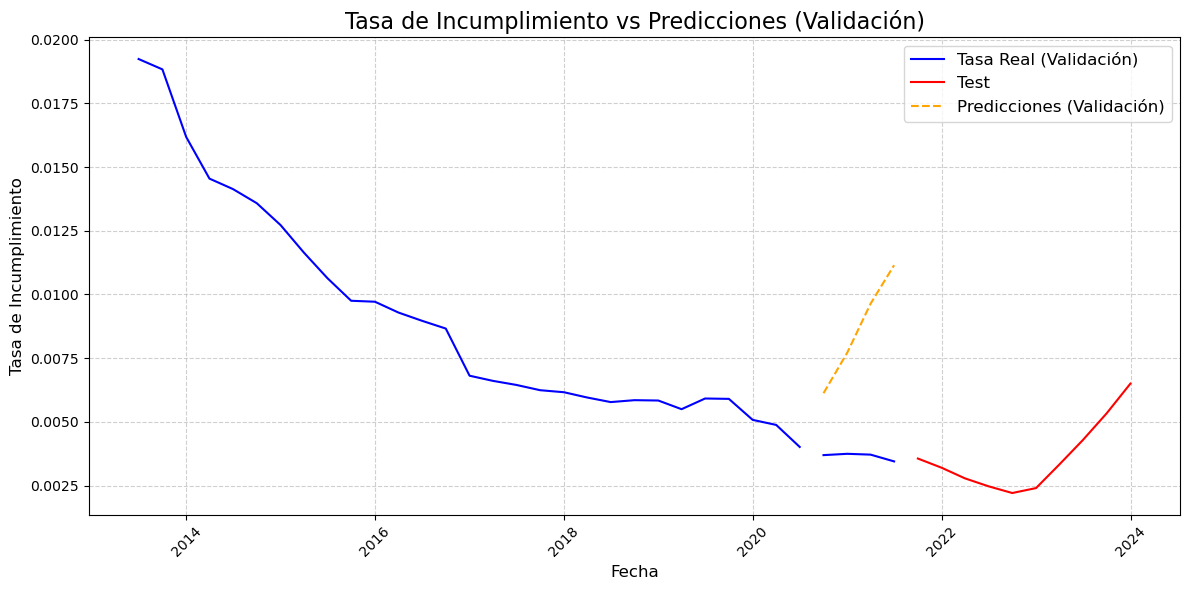

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Definir la frecuencia trimestral en el índice
train["FECHA"] = pd.to_datetime(train["FECHA"])
test["FECHA"] = pd.to_datetime(test["FECHA"])

train.set_index("FECHA", inplace=True)
test.set_index("FECHA", inplace=True)

train = train.asfreq("Q")
test = test.asfreq("Q")

# Dividir el conjunto de entrenamiento en dos partes
train_train = train.iloc[:29]  # Primeras 29 filas para entrenar
train_test = train.iloc[29:]  # Resto de las filas para validar

# Variables dependientes e independientes
y_train = train_train["Tasa_incumplimiento"]
X_train = train_train[["Paro", "PIB", "Precio_vivienda", "Mora_Adq_Vivienda"]]

y_test = train_test["Tasa_incumplimiento"]
X_test = train_test[["Paro", "PIB", "Precio_vivienda", "Mora_Adq_Vivienda"]]

# Configurar el modelo SARIMAX
sarimax_model = SARIMAX(
    endog=y_train,
    exog=X_train,
    order=(1, 1, 1),          # Parámetros p, d, q
    seasonal_order=(1, 0, 1, 4),  # Parámetros P, D, Q, s (s=4 para datos trimestrales)
    enforce_stationarity=False,
    enforce_invertibility=False,
)

# Ajustar el modelo
sarimax_results = sarimax_model.fit(disp=False)

# Resumen del modelo
print(sarimax_results.summary())

# Predicciones en el conjunto de validación (train_test)
train_test["Predicciones"] = sarimax_results.predict(
    start=train_test.index[0], 
    end=train_test.index[-1], 
    exog=X_test
)

# Evaluación del modelo en train_test
mse_test = mean_squared_error(y_test, train_test["Predicciones"])
print(f"MSE (Train Test): {mse_test:.6f}")

# Graficar valores reales vs predicciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Línea para valores reales
plt.plot(train_train.index, train_train["Tasa_incumplimiento"], color="blue", linestyle="-")
plt.plot(train_test.index, train_test["Tasa_incumplimiento"], label="Tasa Real (Validación)", color="blue", linestyle="-")
plt.plot(test.index, test_["Predicciones"], label = 'Test', color= 'r')

# Línea para predicciones
plt.plot(train_test.index, train_test["Predicciones"], label="Predicciones (Validación)", color="orange", linestyle="--")

# Configuración del gráfico
plt.title("Tasa de Incumplimiento vs Predicciones (Validación)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Tasa de Incumplimiento", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
train

,Tasa_incumplimiento,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda,Predicciones
FECHA,,,,,,
2013-06-30,0.019238,0.260571,94.957500,1502.8,0.050392,0.016369
2013-09-30,0.018832,0.256475,94.905500,1495.3,0.055834,0.016525
2013-12-31,0.016180,0.257276,95.063700,1466.9,0.059557,0.016297
2014-03-31,0.014546,0.259278,95.412900,1459.4,0.062813,0.017045
2014-06-30,0.014135,0.244730,95.855100,1459.3,0.060654,0.014505
2014-09-30,0.013581,0.236690,96.564600,1455.8,0.059633,0.013118
2014-12-31,0.012723,0.237015,97.393400,1463.1,0.058511,0.013448
2015-03-31,0.011646,0.237762,98.510900,1457.9,0.058215,0.013582
2015-06-30,0.010642,0.223719,99.567900,1476.8,0.052007,0.011226


1.3 Random Forest Classifier